File name: visualisations

Descriptions: This file visualises the results from the 3 clusters attempts made using the vectorised descriptions. 

In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [2]:
with open('../../data/json/embeddings/kmeans.json', 'r') as f:
    kmeans = json.load(f)

with open('../../data/json/embeddings/agglo.json', 'r') as f:
    agglo = json.load(f)    
    
with open('../../data/json/embeddings/dbscan.json', 'r') as f:
    dbscan = json.load(f)
    

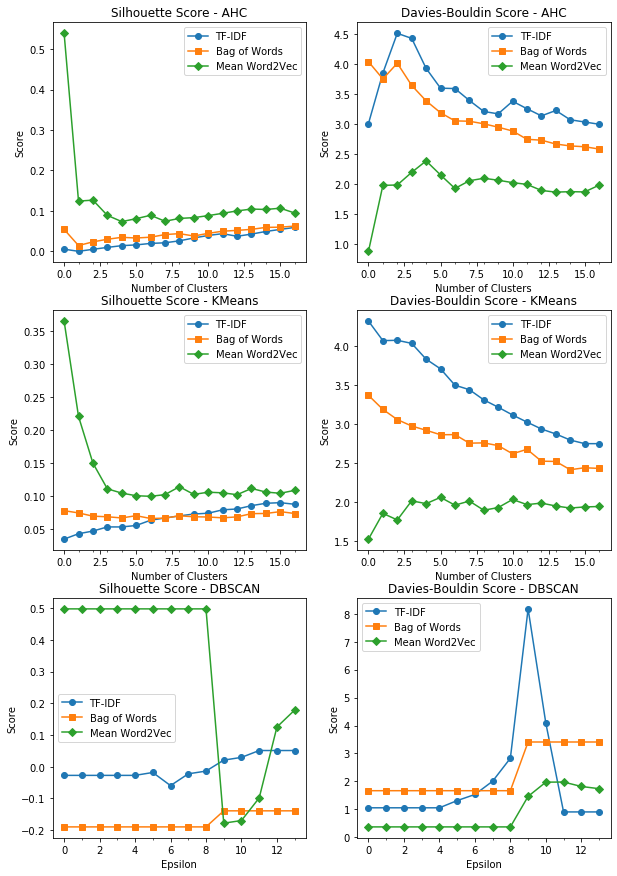

In [11]:
labels = {'tf-idf': 'TF-IDF', 'mean_vector': 'Mean Word2Vec', 'bow': 'Bag of Words'}

fig, ax = plt.subplots(3, 2, figsize=(10, 15))
markers = ['o', 's', 'D']
for i, (embedding_name, embedding) in enumerate(agglo.items()):
    
    ax[0, 0].plot(embedding['silhouette_scores'], label=labels[embedding_name], marker=markers[i])
    ax[0, 0].set_title(f'Silhouette Score - AHC')
    ax[0, 0].set_xticks(np.arange(len(embedding['silhouette_scores'])), range(2, 19))
    ax[0, 0].set_xlabel('Number of Clusters')
    ax[0, 0].set_ylabel('Score')
    ax[0, 0].legend()
    
    ax[0, 1].plot(embedding['davies_bouldin_scores'], label=labels[embedding_name], marker=markers[i])
    ax[0, 1].set_title(f'Davies-Bouldin Score - AHC')
    ax[0, 1].set_xticks(np.arange(len(embedding['davies_bouldin_scores'])), range(2, 19))
    ax[0, 1].set_xlabel('Number of Clusters')
    ax[0, 1].set_ylabel('Score')
    ax[0, 1].legend()

for i, (embedding_name, embedding) in enumerate(kmeans.items()):
    
    ax[1, 0].plot(embedding['silhouette_scores'], label=labels[embedding_name], marker=markers[i])
    ax[1, 0].set_title(f'Silhouette Score - KMeans')
    ax[1, 0].set_xticks(np.arange(len(embedding['silhouette_scores'])), range(2, 19))
    ax[1, 0].set_xlabel('Number of Clusters')
    ax[1, 0].set_ylabel('Score')
    ax[1, 0].legend()
    
    ax[1, 1].plot(embedding['davies_bouldin_scores'], label=labels[embedding_name], marker=markers[i])
    ax[1, 1].set_title(f'Davies-Bouldin Score - KMeans')
    ax[1, 1].set_xticks(np.arange(len(embedding['davies_bouldin_scores'])), range(2, 19))
    ax[1, 1].set_xlabel('Number of Clusters')
    ax[1, 1].set_ylabel('Score')
    ax[1, 1].legend()

    
for i, (embedding_name, embedding) in enumerate(dbscan.items()):
    ax[2, 0].plot(embedding['silhouette_scores'], label=labels[embedding_name], marker=markers[i])
    ax[2, 0].set_title(f'Silhouette Score - DBSCAN')
    ax[2, 0].set_xticks(np.arange(len(embedding['silhouette_scores'])), [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
    ax[2, 0].set_xlabel('Epsilon')
    ax[2, 0].set_ylabel('Score')
    ax[2, 0].legend()
    
    ax[2, 1].plot(embedding['davies_bouldin_scores'], label=labels[embedding_name], marker=markers[i])
    ax[2, 1].set_title(f'Davies-Bouldin Score - DBSCAN')
    ax[2, 1].set_xticks(np.arange(len(embedding['davies_bouldin_scores'])), [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
    ax[2, 1].set_xlabel('Epsilon')
    ax[2, 1].set_ylabel('Score')
    ax[2, 1].legend()

plt.tight_layout
plt.show()

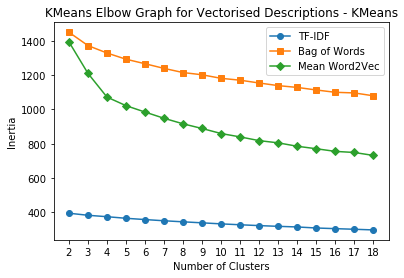

In [4]:
markers = ['o', 's', 'D']

for i, (embedding_name, embedding) in enumerate(kmeans.items()):
    plt.plot(embedding['inertia'], label=labels[embedding_name], marker=markers[i])
    
plt.title(f'KMeans Elbow Graph for Vectorised Descriptions - KMeans')
plt.xticks(np.arange(len(embedding['inertia'])), range(2, 19))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()


In [5]:
kmeans

{'tf-idf': {'inertia': [393.2218689745839,
   381.17424142614755,
   372.84186492058654,
   363.62372041333674,
   356.0738604519032,
   349.087337346426,
   342.8809444987315,
   336.97899486849303,
   330.9004589077945,
   325.62351492718705,
   320.76256808606456,
   316.5075113265015,
   312.8608622217402,
   306.7570562927063,
   302.9690175509907,
   299.3723147794122,
   295.55393544288637],
  'silhouette_scores': [0.03503912190606213,
   0.04316440891124012,
   0.04724185591499238,
   0.05349601471275677,
   0.05346618275451456,
   0.05568187007313266,
   0.06364198275238271,
   0.06703271206596316,
   0.07018696655300811,
   0.0730480384855174,
   0.07426692442344851,
   0.0793863487343934,
   0.08069003463401979,
   0.085693231501647,
   0.08931922446618597,
   0.09021444597344684,
   0.08780394557581063],
  'davies_bouldin_scores': [4.322154441431233,
   4.071712758063165,
   4.0758291652101715,
   4.036243989786391,
   3.8338072705734128,
   3.7098092878066913,
   3.5001135

In [30]:
dataframe = pd.read_csv('../../data/description_embeddings.csv')
og_df = pd.read_csv('../../data/reduced_gin_data.csv')

merged_df = pd.merge(
    dataframe,
    og_df,
    on="File Name",
    how="right"
)

merged_df.drop("Juniper", axis=1, inplace=True)
merged_df.dropna(inplace=True)

botanicals = merged_df.iloc[:,31:282]
botanicals


,Rosewater,Honey,Lemon Myrtle,Herb-Robert,Camomile,Rose,Jasmine,Passion Flower,Acacia Flower,Elderflower,...,Clementine,Tangerine,Black Lemon,Buddha's Hand,Calamansi,Jaffa Cakes,Treacle,Bee Pollen,Collagen,Angostura Bitters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(np.array(botanicals))
x = tsne_results[:, 0]
y = tsne_results[:, 1]

Text(0, 0.5, 't-SNE Component 2')

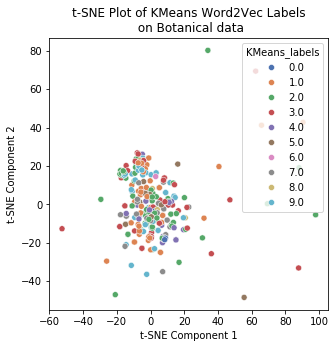

In [34]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=merged_df["KMeans_labels"], palette="deep", legend="full")
plt.title("t-SNE Plot of KMeans Word2Vec Labels\n on Botanical data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

Text(0, 0.5, 't-SNE Component 2')

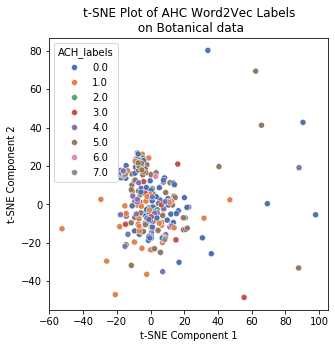

In [33]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=merged_df["ACH_labels"], palette="deep", legend="full")
plt.title("t-SNE Plot of AHC Word2Vec Labels\n on Botanical data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")